In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({"figure.figsize":(16, 9), "grid.alpha":0.21})
plt.style.use("seaborn-whitegrid")

In [2]:
# From yahoo https://finance.yahoo.com/quote/SPY?p=SPY
spx = pd.read_csv("../Data/SPY.csv", index_col="Date")
spx.index = pd.to_datetime(spx.index, format="%Y-%m-%d")
spx["gap_pct"] = (spx["Open"] / spx["Close"].shift(1)) - 1 # gap percent
spx["pct_cc"] = (spx["Close"] / spx["Close"].shift(1)) - 1 # close to close percent
spx["pct_oc"] = (spx["Close"] / spx["Open"]) - 1 # open to close percent

In [3]:
instances = pd.DataFrame()

for i in range(len(spx)):
    gap_amount = -0.02 # 2% gap down
    if spx["gap_pct"].iloc[i] <= gap_amount and spx["gap_pct"].iloc[i-1] > gap_amount:
        rets = spx["pct_cc"].iloc[i-1: i+15]
        rets.iloc[0] = 0 # zeroing day before the gap
        rets.iloc[1] = spx["pct_oc"].iloc[i] # day 0 pct is open to close
        rets = rets.reset_index(drop=True)
        instances[spx.index[i]] = rets

Text(0.5,0,'Days since gap')

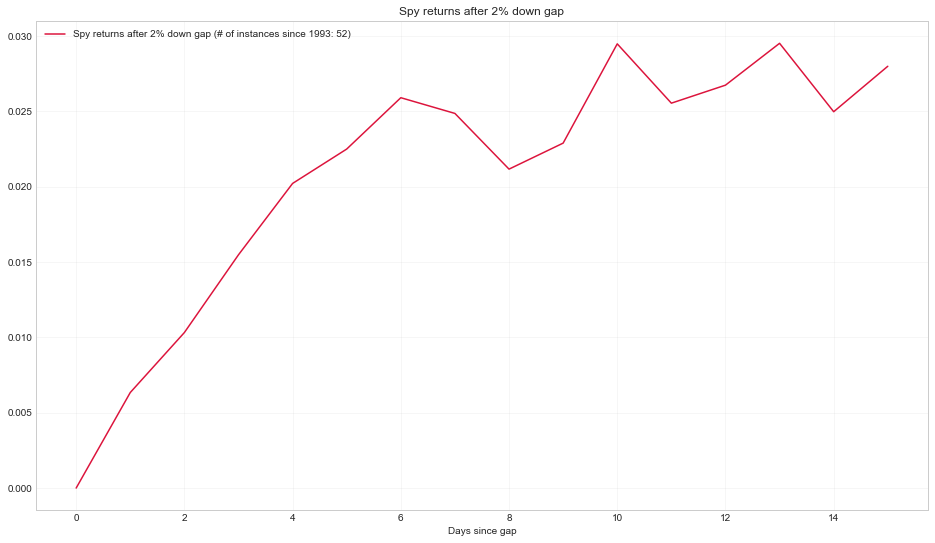

In [11]:
plt.title("Spy returns after 2% down gap")
plt.plot(instances.mean(axis=1).cumsum(), color="crimson", label="Spy returns after 2% down gap (# of instances since {}: {})".format(spx.index.year[0], len(instances.columns)))
plt.legend(loc="upper left")
plt.xlabel("Days since gap")

In [169]:
for i in range(2, 8):
    all_rets = instances.iloc[1:i].cumsum().iloc[-1, :]
    pct_profitable = len(all_rets[all_rets > 0]) / len(all_rets)
    print("Buy open(t+0) sell close(t+{}): pct profitable {}".format(i-2, round(pct_profitable, 2)))

Buy open(t+0) sell close(t+0): pct profitable 0.54
Buy open(t+0) sell close(t+1): pct profitable 0.67
Buy open(t+0) sell close(t+2): pct profitable 0.69
Buy open(t+0) sell close(t+3): pct profitable 0.77
Buy open(t+0) sell close(t+4): pct profitable 0.73
Buy open(t+0) sell close(t+5): pct profitable 0.69
